On décrit ici les étapes de construction de la base d’entraînement commune aux deux modèles.
*	Périmètre des données Crédit Logement :
*	Opérations mises en place (avec une date de mise en place)
*	De type maison (MAI) ou appartement (APT)
*	De nature Acquisition (codes 'AQA' – acquisition ancien,'AQN' – acquisition neuf, 'ARA' – acquisition ancien + rachat, 'ARN' – acquisition neuf + rachat, 'ATR' – acquisition + travaux + rachat ou 'ATV' – acquisition + travaux)
	De valeur foncière supérieure à 10 000

Périmètre des données DVF :
*	De type maison ou appartement
*	De nature ‘Vente’ ou ‘Vente en l’état futur d’achèvement’
*	Sans local commercial ou industriel
*	De valeur foncière supérieure à 10 000


In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from datetime import datetime
import logging
import math



# NOMBRE D'ANNEES RECENTES A IMPORTER (N DERNIERES ANNEES)
N_YEARS = 3  # pour le modele ML


df = pd.read_parquet("Z:\data\cl_estim\cleaned_data\df_transac_clean.parquet")
df

CD_OP CD_NATUR_OP  MT_ENCOURS CD_STATUT  NB_SURF_HAB  \
0         M250801597         AQA         0.0       APF         61.0   
1         M250803446         AQA         0.0       APF          NaN   
2         M250803701         AQA         0.0       APF        101.0   
3         M250800248         AQA         0.0       APF          NaN   
4         M250804487         AQA         0.0       APF          NaN   
...              ...         ...         ...       ...          ...   
11152014  M220141473         ACO         NaN      None          NaN   
11152015  M230415481         AQA         NaN      None          NaN   
11152016  M230414333         AQA         NaN      None          NaN   
11152017  M240422160         AQA         NaN      None          NaN   
11152018  M241009352         AQA         NaN      None          NaN   

          NB_SURF_CREE  NB_PIECES  NB_SURF_TER    MT_VAL  VALEUR_FONCIERE  \
0                  NaN        3.0        352.0       0.0         100000.0   
1                  NaN        NaN          NaN       0.0         339000.0   
2                  NaN        NaN          NaN  300000.0         300000.0   
3                  NaN        NaN          NaN       0.0         151000.0   
4                  NaN        NaN          NaN       0.0         399000.0   
...                ...        ...          ...       ...              ...   
11152014           NaN        NaN          NaN       NaN         248000.0   
11152015           NaN        NaN          NaN       NaN         250000.0   
11152016           NaN        NaN          NaN       NaN          90000.0   
11152017           NaN        NaN          NaN       NaN         193000.0   
11152018           NaN        NaN          NaN       NaN         240000.0   

          ...  MAX_surface_reelle_bati_unique  NOMBRE_LOTS  nb_PARCELLES  \
0         ...                             NaN          NaN           NaN   
1         ...                             NaN          NaN           NaN   
2         ...                             NaN          NaN           NaN   
3         ...                             NaN          NaN           NaN   
4         ...                             NaN          NaN           NaN   
...       ...                             ...          ...           ...   
11152014  ...                             NaN          NaN           NaN   
11152015  ...                             NaN          NaN           NaN   
11152016  ...                             NaN          NaN           NaN   
11152017  ...                             NaN          NaN           NaN   
11152018  ...                             NaN          NaN           NaN   

         Habitation_unique Dependance_unique  Terrain_unique  \
0                      NaN               NaN             NaN   
1                      NaN               NaN             NaN   
2                      NaN               NaN             NaN   
3                      NaN               NaN             NaN   
4                      NaN               NaN             NaN   
...                    ...               ...             ...   
11152014               NaN               NaN             NaN   
11152015               NaN               NaN             NaN   
11152016               NaN               NaN             NaN   
11152017               NaN               NaN             NaN   
11152018               NaN               NaN             NaN   

          nb_TYPE_LOCAL_Maison nb_TYPE_LOCAL_Appartement  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       NaN   
...                        ...                       ...   
11152014                   NaN                       NaN   
11152015                   NaN                       NaN   
11152016       

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11152019 entries, 0 to 11152018
Data columns (total 90 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   CD_OP                           object        
 1   CD_NATUR_OP                     object        
 2   MT_ENCOURS                      float32       
 3   CD_STATUT                       object        
 4   NB_SURF_HAB                     float64       
 5   NB_SURF_CREE                    float32       
 6   NB_PIECES                       float64       
 7   NB_SURF_TER                     float64       
 8   MT_VAL                          float32       
 9   VALEUR_FONCIERE                 float32       
 10  MT_REVENU_ANN                   float32       
 11  AGE_EMP1                        float32       
 12  AGE_EMP2                        float32       
 13  CD_CSP_EMP1                     object        
 14  CD_CSP_EMP2                     object        
 

Importation des classes de détection d'anomalies de CL_ESTIM

In [3]:
from datetime import timedelta, datetime
from dateutil.relativedelta import relativedelta
from prez.classe import (DateOffset,
                         ImportRecentData,
                         CalcMetaNum,
                         EffectifsParMailleGeo,
                         DefMailleGeoCITY,
                         DetectAno,
                         detect_ano_ml

)
import numpy as np


Fonction detect_ano_ml

In [4]:
base_ml = detect_ano_ml(input_df=df, date_min = None, date_max = None, type_bien = None)

n:\uflumth\indicateur_marche\prix_m2\my_cl_estim\prez\classe.py:256: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[0] is not None:
n:\uflumth\indicateur_marche\prix_m2\my_cl_estim\prez\classe.py:258: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (str(x[0])[:3] not in ["750", "690"]) and (
n:\uflumth\indicateur_marche\prix_m2\my_cl_estim\prez\classe.py:268: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x[0], "ARR"
n:\u

In [5]:
print(base_ml)

              CD_OP     ville_          LIBELLE_DEPT TYPE_BIEN       DATE  \
0        M250808382      PARIS                 Paris       APT 2025-09-01   
1        M250726639       LYON                 Rhône       APT 2025-09-01   
2        M250808014     NANTES      Loire-Atlantique       APT 2025-09-01   
3        M250806529  MARTIGUES      Bouches-du-Rhône       APT 2025-09-01   
4        M250805802      PARIS                 Paris       APT 2025-09-01   
...             ...        ...                   ...       ...        ...   
2143161        None     TARBES                  None       MAI 2015-09-01   
2143162  M150691507      PARIS                 Paris       APT 2015-09-01   
2143163        None  MARSEILLE                  None       APT 2015-09-01   
2143164        None   COLOMBES                  None       APT 2015-09-01   
2143165  M150611325     ANGLET  Pyrénées-Atlantiques       MAI 2015-09-01   

         YEAR       Prix_m2 SOURCE CD_NATUR_OP  
0        2025  13670.88574

### Présentation bdd

In [6]:
print(base_ml.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143166 entries, 0 to 2143165
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   CD_OP         object        
 1   ville_        object        
 2   LIBELLE_DEPT  object        
 3   TYPE_BIEN     object        
 4   DATE          datetime64[ns]
 5   YEAR          int64         
 6   Prix_m2       float64       
 7   SOURCE        object        
 8   CD_NATUR_OP   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 147.2+ MB
None


In [7]:
print(f"Répartition du nombre de transactions par ville sur 10 ans :{base_ml.groupby('ville_')['CD_OP'].count()}")
print(f"Répartition du nombre de transactions par département sur 10 ans :{base_ml.groupby('LIBELLE_DEPT')['CD_OP'].count()}")

Répartition du nombre de transactions par ville sur 10 ans :ville_
ALBI             953
ALES             451
ALFORTVILLE     2719
AMIENS          6503
ANGERS          6122
                ... 
VERSAILLES      5273
VILLEJUIF       3058
VILLEURBANNE    7827
VINCENNES       4040
WATTRELOS       1390
Name: CD_OP, Length: 117, dtype: int64
Répartition du nombre de transactions par département sur 10 ans :LIBELLE_DEPT
Aisne                          3
Allier                         2
Alpes-Maritimes            28213
Alpes-de-Haute-Provence        1
Ardennes                       1
                           ...  
Var                        10673
Vaucluse                    2833
Vendée                        18
Vienne                      3128
Yvelines                    9299
Name: CD_OP, Length: 66, dtype: int64


In [10]:
print(f"Répartition du type de bien par an :{base_ml.groupby('YEAR')['CD_OP'].count()}")


Répartition du type de bien par an :YEAR
2015    21767
2016    64363
2017    73156
2018    72334
2019    81665
2020    63180
2021    79557
2022    71102
2023    38652
2024    43417
2025    24793
Name: CD_OP, dtype: int64


In [11]:
print(f"Répartition du type de bien par ville sur 10 ans :{base_ml.groupby('ville_')['TYPE_BIEN'].count()}")
print(f"Répartition du type de bien par département sur 10 ans :{base_ml.groupby('LIBELLE_DEPT')['TYPE_BIEN'].count()}")

Répartition du type de bien par ville sur 10 ans :ville_
ALBI             7790
ALES             5200
ALFORTVILLE      6241
AMIENS          21259
ANGERS          26541
                ...  
VERSAILLES      11498
VILLEJUIF        6905
VILLEURBANNE    27491
VINCENNES        8914
WATTRELOS        4659
Name: TYPE_BIEN, Length: 117, dtype: int64
Répartition du type de bien par département sur 10 ans :LIBELLE_DEPT
Aisne                          3
Allier                         2
Alpes-Maritimes            28213
Alpes-de-Haute-Provence        1
Ardennes                       1
                           ...  
Var                        10673
Vaucluse                    2833
Vendée                        18
Vienne                      3128
Yvelines                    9299
Name: TYPE_BIEN, Length: 66, dtype: int64


In [13]:
print(f"Répartition du type d'acquisition :{base_ml.groupby('CD_NATUR_OP')['CD_OP'].count()}")


Répartition du type d'acquisition :CD_NATUR_OP
ACO      3177
ACR       172
AQA    426202
AQN    120813
ARA     10113
ARN       780
ATR      1812
ATV     70917
Name: CD_OP, dtype: int64


In [18]:
# Voir les valeurs uniques dans SOURCE
print(base_ml['SOURCE'].unique())

# Compter les valeurs non nulles de CD_OP par source
print(base_ml.groupby('SOURCE')['CD_OP'].apply(lambda x: x.notna().sum()))

['CL' 'DVF']
SOURCE
CL     633986
DVF         0
Name: CD_OP, dtype: int64


In [24]:
print(f"Répartition du type de source :{base_ml['SOURCE'].value_counts()}")

Répartition du type de source :SOURCE
DVF    1509180
CL      633986
Name: count, dtype: int64


Notre but ici est de pouvoir calculer l'évolutin des prix au m2 des appartements sur un an. LPI-IAD se base sur une méthode de moyenne glissante sur 12 mois: on prend la moyenne des prix au m2 des 12 derniers mois  au mois actuel, puis on prend la moyenne des prix au m2 des 12 derniers mois au même mois de l'année dernière et on calcul l'évolution.

In [25]:
df_prix_na = base_ml["Prix_m2"].isna().sum()
print(f"{df_prix_na} données manquantes")
 

75646 données manquantes


On regroupe par ville et par mois

In [26]:
base_ml = base_ml.groupby(["ville_", "DATE"])["Prix_m2"].agg([
    ("Prix_m2_moyen", "mean"),
    ("Q1", lambda x: x.quantile(0.25)),
    ("Median", "median"),
    ("Q3", lambda x: x.quantile(0.75))
]).reset_index()
base_ml

ville_       DATE  Prix_m2_moyen           Q1       Median  \
0           ALBI 2015-09-01    1715.918511  1382.978723  1630.434783   
1           ALBI 2015-10-01    1923.424731  1373.161765  1768.421053   
2           ALBI 2015-11-01    1956.659734  1388.144841  1675.515233   
3           ALBI 2015-12-01    1972.851006  1246.905393  1639.344262   
4           ALBI 2016-01-01    1857.019530  1336.956522  1838.709677   
...          ...        ...            ...          ...          ...   
13948  WATTRELOS 2025-03-01    2003.084552  1528.428784  2164.818328   
13949  WATTRELOS 2025-04-01    1718.736750  1503.343399  1683.215130   
13950  WATTRELOS 2025-05-01    2024.320477  1716.905738  1807.142857   
13951  WATTRELOS 2025-06-01    2135.881160  1848.837209  2166.666667   
13952  WATTRELOS 2025-08-01            NaN          NaN          NaN   

                Q3  
0      1851.063830  
1      2184.523810  
2      2045.770922  
3      2244.611059  
4      2060.236486  
...            ...  
13948  2422.324159  
13949  1770.454545  
13950  2279.090473  
13951  2625.000000  
13952          NaN  

[13953 rows x 6 columns]

Répartition des NA

In [27]:
na_par_ville = base_ml.groupby("ville_")["Prix_m2_moyen"].apply(lambda x: x.isna().mean()*100)

na_counts = na_par_ville.round(1).value_counts().sort_index()

print("Répartition des pourcentages de NA :")
print(na_counts)

na_counts_nozero = na_counts[na_counts.index > 0]

Répartition des pourcentages de NA :
Prix_m2_moyen
0.0    95
0.8    22
Name: count, dtype: int64


Nombre de villes par catégorie :
0%       95
0-10%    22
Name: count, dtype: int64


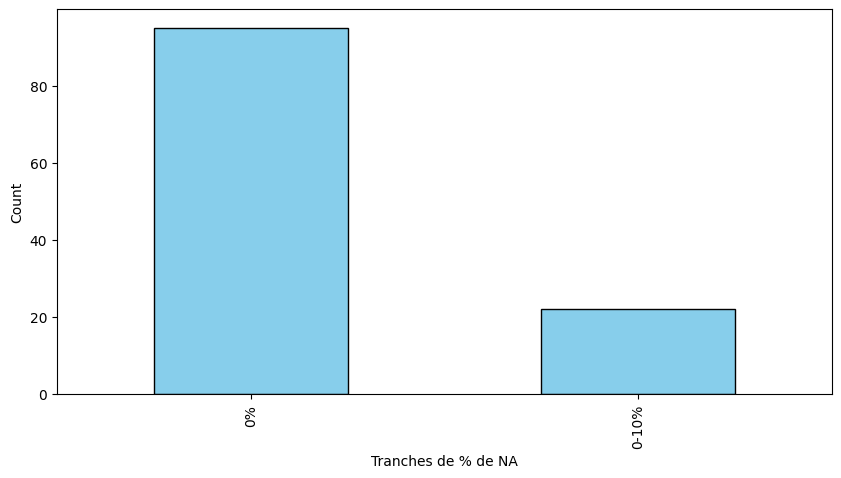

In [28]:
na_par_ville = base_ml.groupby("ville_")["Prix_m2_moyen"].apply(lambda x: x.isna().mean()*100)


categories = pd.Series(index=na_par_ville.index, dtype="object")


categories[na_par_ville == 0] = "0%"
categories[na_par_ville == 100] = "100%"


bins = [0, 10, 30, 50, 85, 100]
labels = ["0-10%", "10-30%", "30-50%", "50-85%", "85-100%"]

mask = categories.isna()
categories[mask] = pd.cut(na_par_ville[mask], bins=bins, labels=labels, include_lowest=True, right=False)

counts = categories.value_counts().sort_index()
counts = counts
print("Nombre de villes par catégorie :")
print(counts)

ax = counts.plot(kind="bar", figsize=(10,5), color="skyblue", edgecolor="k")
ax.set_xlabel("Tranches de % de NA")
ax.set_ylabel("Count")
plt.show()

On remarque que la grande majorité des villes n'ont pas de valeurs manquantes. Puis on remarque qu'un grand nombre de villes possède moins de 10% de valeurs manquantes

In [29]:
na_par_annee = (base_ml.assign(annee = base_ml["DATE"].dt.year).groupby("annee")["Prix_m2_moyen"].apply(lambda x: x.isna().mean()*100).sort_index())
print(na_par_annee)

annee
2015    0.000000
2016    0.000000
2017    0.000000
2018    0.000000
2019    0.000000
2020    0.000000
2021    0.000000
2022    0.000000
2023    0.000000
2024    0.000000
2025    2.591284
Name: Prix_m2_moyen, dtype: float64


In [30]:
resultats = []

base_ml["moyenne_glissante_12m"] = (
    base_ml.groupby("ville_")["Prix_m2_moyen"]
    .rolling(window=12, min_periods=12)
    .mean()
    .reset_index(level=0, drop=True)
)

for ville, groupe in base_ml.groupby("ville_"):
    groupe = groupe.sort_values("DATE")

    # Dernière valeur connue pour Prix_m2
    last_idx = groupe["Prix_m2_moyen"].last_valid_index()
    if last_idx is None:
        continue  
    last_row = groupe.loc[last_idx]
    date_last = last_row["DATE"]
    prix_last = last_row["Prix_m2_moyen"]

    # Dernière valeur connue pour la moyenne glissante
    moyenne_last_idx = groupe["moyenne_glissante_12m"].last_valid_index()
    moyenne_last = groupe.loc[moyenne_last_idx, "moyenne_glissante_12m"]

    # Calcul de la date de référence pour l'année précédente
    date_previous = date_last - pd.DateOffset(years=1)
    groupe_previous = groupe[groupe["DATE"] <= date_previous]

    if not groupe_previous.empty:
        prev_idx = groupe_previous["moyenne_glissante_12m"].last_valid_index()
        if prev_idx is not None:
            moyenne_previous = groupe_previous.loc[prev_idx, "moyenne_glissante_12m"]
            evolution = ((moyenne_last - moyenne_previous) / moyenne_previous) * 100
        else:
            evolution = None
    else:
        evolution = None

    resultats.append({
        "Ville": ville,
        "Derniere date valide": date_last.date(),
        "Evolution (%)": round(evolution, 2) if evolution is not None else None,
        "Prix_m2_moyen": prix_last
    })


rdf = pd.DataFrame(resultats)
rdf

Ville Derniere date valide  Evolution (%)  Prix_m2_moyen
0            ALBI           2025-06-01           5.19    2122.378934
1            ALES           2025-06-01          -1.49    2013.035129
2     ALFORTVILLE           2025-07-01          -4.96    5661.550257
3          AMIENS           2025-09-01          -2.38    1512.820557
4          ANGERS           2025-07-01           4.52    4075.414902
..            ...                  ...            ...            ...
112    VERSAILLES           2025-07-01          -1.21    7731.474076
113     VILLEJUIF           2025-07-01          -0.20    5336.415551
114  VILLEURBANNE           2025-07-01           1.41    3999.032324
115     VINCENNES           2025-07-01           2.16   11426.829102
116     WATTRELOS           2025-06-01           4.95    2135.881160

[117 rows x 4 columns]

In [31]:
rdf_date_min = rdf["Derniere date valide"].min()
print(rdf_date_min)


2025-06-01


In [62]:
top15 = ["PARIS", "MARSEILLE", "LYON", "LILLE", "RENNES", " TOULOUSE", "BORDEAUX", "NICE", "STRASBOURG", "NANTES", "MONTPELLIER",
         "TOULON", "REIMS", "SAINT-ETIENNE", "LE HAVRE"]

In [64]:
df_top15 = base_ml[base_ml["ville_"].isin(top15)]
df_top15

ville_       DATE  Prix_m2_moyen           Q1       Median  \
2732   BORDEAUX 2015-09-01    3405.671112  2675.492611  3242.857143   
2733   BORDEAUX 2015-10-01    3378.622988  2690.149137  3346.363636   
2734   BORDEAUX 2015-11-01    3382.273594  2645.161290  3245.614035   
2735   BORDEAUX 2015-12-01    3417.044455  2743.589744  3341.463415   
2736   BORDEAUX 2016-01-01    3436.427620  2723.019126  3277.777778   
...         ...        ...            ...          ...          ...   
12395    TOULON 2025-04-01    2972.029993  2323.170732  2955.555556   
12396    TOULON 2025-05-01    3181.188446  2284.902597  2949.612403   
12397    TOULON 2025-06-01    3331.132005  2560.972744  2920.866271   
12398    TOULON 2025-07-01    1694.697497  1433.555645  1694.697497   
12399    TOULON 2025-08-01            NaN          NaN          NaN   

                Q3  moyenne_glissante_12m  
2732   3889.302508                    NaN  
2733   3975.693509                    NaN  
2734   3875.000000                    NaN  
2735   4000.000000                    NaN  
2736   4034.069281                    NaN  
...            ...                    ...  
12395  3329.865361            3146.685446  
12396  4154.330842            3141.533521  
12397  3918.506494            3137.767775  
12398  1955.839349            3018.536149  
12399          NaN                    NaN  

[1446 rows x 7 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

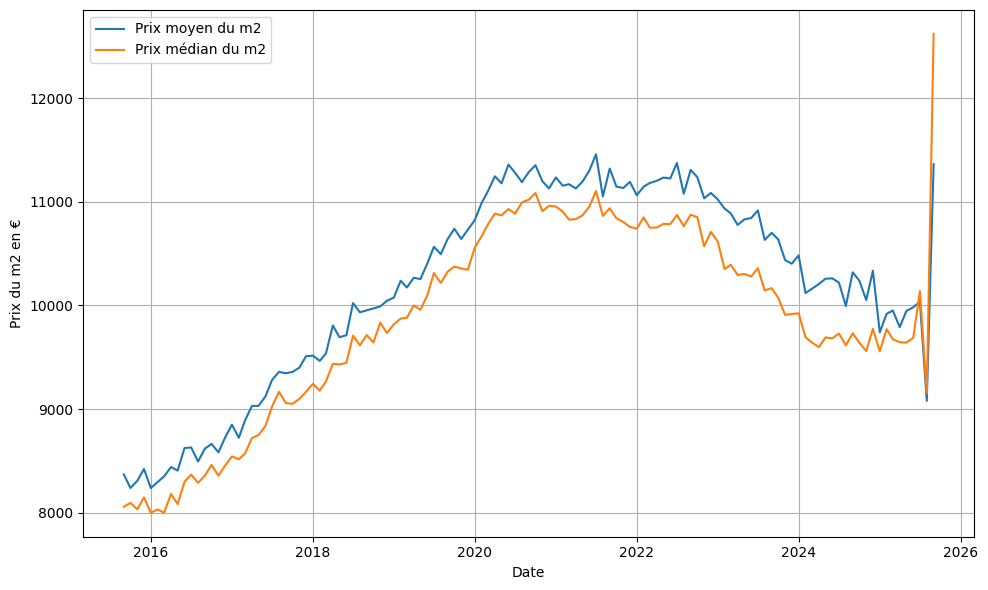

In [61]:
plt.figure(figsize = (10,6))
plt.plot(df_paris["DATE"], df_paris["Prix_m2_moyen"], label = "Prix moyen du m2" )
plt.plot(df_paris["DATE"], df_paris["Median"], label = "Prix médian du m2")

plt.legend()

plt.xlabel("Date")
plt.ylabel("Prix du m2 en €")
plt.grid(True)
plt.tight_layout()
plt.show

# Comparaison avec LPI-IAD

L'utilisation de notre méthode ci-dessus implique la base de mois de mai 2025 comme date minimum commune entre toutes les villes. On pourra éventuellement se concentrer sur le top 15 villes plus tard.
On compare alors les données de mai 2025 CL vs LPI-IAD

In [32]:
base_ml2 = detect_ano_ml(input_df=df, date_min = "2022-08-01", date_max = "2025-07-01", type_bien = "APT")

n:\uflumth\indicateur_marche\prix_m2\my_cl_estim\prez\classe.py:256: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[0] is not None:
n:\uflumth\indicateur_marche\prix_m2\my_cl_estim\prez\classe.py:258: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (str(x[0])[:3] not in ["750", "690"]) and (
n:\uflumth\indicateur_marche\prix_m2\my_cl_estim\prez\classe.py:259: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(x[0]) not in marsei

In [33]:
base_ml2 = base_ml2.rename(columns={"ville_":"Ville"})
print(base_ml2)

             CD_OP      Ville      LIBELLE_DEPT TYPE_BIEN       DATE  YEAR  \
0       M250605976  MARSEILLE  Bouches-du-Rhône       APT 2025-06-01  2025   
1       M250404655   TOULOUSE     Haute-Garonne       APT 2025-06-01  2025   
2       M250429303       METZ           Moselle       APT 2025-06-01  2025   
3       M250523635     MEUDON    Hauts-de-Seine       APT 2025-06-01  2025   
4       M250605094   TOULOUSE     Haute-Garonne       APT 2025-06-01  2025   
...            ...        ...               ...       ...        ...   ...   
400239        None      BREST              None       APT 2022-08-01  2022   
400240        None       NICE              None       APT 2022-08-01  2022   
400241        None      PARIS              None       APT 2022-08-01  2022   
400242        None       NICE              None       APT 2022-08-01  2022   
400243        None   POITIERS              None       APT 2022-08-01  2022   

             Prix_m2 SOURCE CD_NATUR_OP  
0        3161.290323 

In [34]:
df_prix_na = base_ml2["Prix_m2"].isna().sum()
print(f"{df_prix_na} données manquantes")

10276 données manquantes


In [35]:
base_ml2 = base_ml2.groupby(["Ville", "DATE"])["Prix_m2"].agg([
    ("Prix_m2_moyen", "mean"),
    ("Q1", lambda x: x.quantile(0.25)),
    ("Median", "median"),
    ("Q3", lambda x: x.quantile(0.75))
]).reset_index()
base_ml2

Ville       DATE  Prix_m2_moyen           Q1       Median  \
0          ALBI 2022-08-01    2419.964295  1890.243902  2419.354839   
1          ALBI 2022-09-01    2571.928973  1978.125000  2266.190476   
2          ALBI 2022-10-01    2534.970875  2115.333333  2505.967604   
3          ALBI 2022-11-01    2496.268209  2054.421769  2407.407407   
4          ALBI 2022-12-01    2588.507390  2111.111111  2500.000000   
...         ...        ...            ...          ...          ...   
4085  WATTRELOS 2025-02-01    1884.821429  1820.982143  1884.821429   
4086  WATTRELOS 2025-03-01    2533.333333  2533.333333  2533.333333   
4087  WATTRELOS 2025-04-01    1434.426230  1434.426230  1434.426230   
4088  WATTRELOS 2025-05-01            NaN          NaN          NaN   
4089  WATTRELOS 2025-06-01    2236.918605  2042.877907  2236.918605   

               Q3  
0     2761.111111  
1     2890.185322  
2     2664.062500  
3     2869.208838  
4     3043.478261  
...           ...  
4085  1948.660714  
4086  2533.333333  
4087  1434.426230  
4088          NaN  
4089  2430.959302  

[4090 rows x 6 columns]

In [36]:
na_par_ville = base_ml2.groupby("Ville")["Prix_m2_moyen"].apply(lambda x: x.isna().mean()*100)

na_counts = na_par_ville.round(1).value_counts().sort_index()

print("Répartition des pourcentages de NA :")
print(na_counts)

na_counts_nozero = na_counts[na_counts.index > 0]

Répartition des pourcentages de NA :
Prix_m2_moyen
0.0    108
2.9      7
5.7      1
5.9      1
Name: count, dtype: int64


Nombre de villes par catégorie :
0%       108
0-10%      9
Name: count, dtype: int64


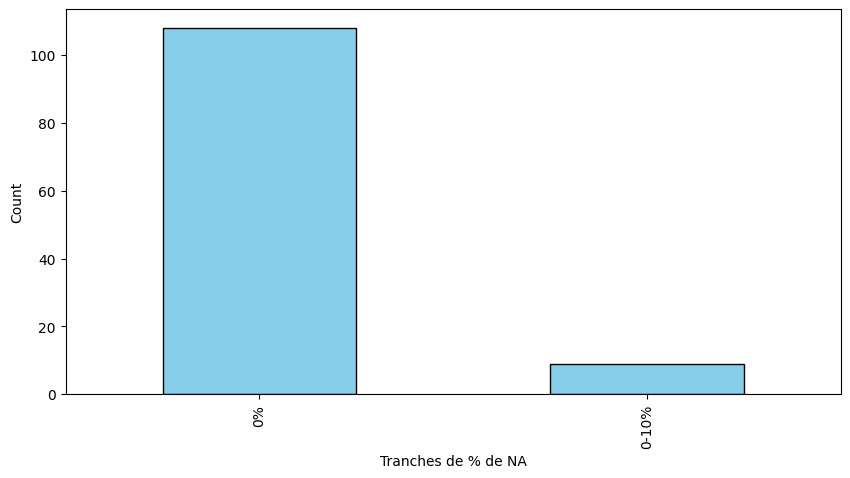

In [37]:
na_par_ville = base_ml2.groupby("Ville")["Prix_m2_moyen"].apply(lambda x: x.isna().mean()*100)


categories = pd.Series(index=na_par_ville.index, dtype="object")

categories[na_par_ville == 0] = "0%"
categories[na_par_ville == 100] = "100%"


bins = [0, 10, 30, 50, 85, 100]
labels = ["0-10%", "10-30%", "30-50%", "50-85%", "85-100%"]

mask = categories.isna()
categories[mask] = pd.cut(na_par_ville[mask], bins=bins, labels=labels, include_lowest=True, right=False)

counts = categories.value_counts().sort_index()
counts = counts
print("Nombre de villes par catégorie :")
print(counts)

ax = counts.plot(kind="bar", figsize=(10,5), color="skyblue", edgecolor="k")
ax.set_xlabel("Tranches de % de NA")
ax.set_ylabel("Count")
plt.show()

In [38]:
na_par_annee = (base_ml.assign(annee = base_ml["DATE"].dt.year).groupby("annee")["Prix_m2_moyen"].apply(lambda x: x.isna().mean()*100).sort_index())
print(na_par_annee)

annee
2015    0.000000
2016    0.000000
2017    0.000000
2018    0.000000
2019    0.000000
2020    0.000000
2021    0.000000
2022    0.000000
2023    0.000000
2024    0.000000
2025    2.591284
Name: Prix_m2_moyen, dtype: float64


In [39]:
resultats = []

base_ml2["moyenne_glissante_12m"] = (
    base_ml2.groupby("Ville")["Prix_m2_moyen"]
    .rolling(window=12, min_periods=12)
    .mean()
    .reset_index(level=0, drop=True)
)

for ville, groupe in base_ml2.groupby("Ville"):
    groupe = groupe.sort_values("DATE")

    # Dernière valeur connue pour Prix_m2
    last_idx = groupe["Prix_m2_moyen"].last_valid_index()
    if last_idx is None:
        continue  
    last_row = groupe.loc[last_idx]
    date_last = last_row["DATE"]
    prix_last = last_row["Prix_m2_moyen"]
    Q1_last = last_row["Q1"]
    median_last = last_row["Median"]
    Q3_last = last_row["Q3"]

    # Dernière valeur connue pour la moyenne glissante
    moyenne_last_idx = groupe["moyenne_glissante_12m"].last_valid_index()
    moyenne_last = groupe.loc[moyenne_last_idx, "moyenne_glissante_12m"]

    # Calcul de la date de référence pour l'année précédente
    date_previous = date_last - pd.DateOffset(years=1)
    groupe_previous = groupe[groupe["DATE"] <= date_previous]

    if not groupe_previous.empty:
        prev_idx = groupe_previous["moyenne_glissante_12m"].last_valid_index()
        if prev_idx is not None:
            moyenne_previous = groupe_previous.loc[prev_idx, "moyenne_glissante_12m"]
            evolution = ((moyenne_last - moyenne_previous) / moyenne_previous) * 100
        else:
            evolution = None
    else:
        evolution = None

    resultats.append({
        "Ville": ville,
        "Derniere date valide": date_last.date(),
        "Evolution en % - CL": round(evolution, 2) if evolution is not None else None,
        "Prix moyen du m2 - CL": prix_last,
        "Prix du m2 (Q1) - CL" : Q1_last ,
        "Prix du m2 (médian) - CL" : median_last,
        "Prix du m2 (Q3) - CL" : Q3_last
    })


rdf = pd.DataFrame(resultats)
rdf["Derniere date valide"] = pd.to_datetime(rdf["Derniere date valide"])
rdf

Ville Derniere date valide  Evolution en % - CL  \
0            ALBI           2025-06-01                 9.83   
1            ALES           2025-06-01                 0.26   
2     ALFORTVILLE           2025-06-01                -5.58   
3          AMIENS           2025-06-01                 2.26   
4          ANGERS           2025-06-01                 4.94   
..            ...                  ...                  ...   
112    VERSAILLES           2025-06-01                -1.90   
113     VILLEJUIF           2025-06-01                 2.53   
114  VILLEURBANNE           2025-06-01                 0.18   
115     VINCENNES           2025-06-01                 0.03   
116     WATTRELOS           2025-06-01                -4.28   

     Prix moyen du m2 - CL  Prix du m2 (Q1) - CL  Prix du m2 (médian) - CL  \
0              3475.000000           3475.000000               3475.000000   
1              1677.156177           1530.885781               1677.156177   
2              4771.898855           4037.485984               4777.777778   
3              3158.490654           2794.117647               3166.666667   
4              3621.721401           2867.424242               3350.765306   
..                     ...                   ...                       ...   
112            6444.397070           5423.626374               6494.363929   
113            4863.105907           4099.423963               5117.032967   
114            3864.056865           3066.105769               3592.307692   
115            9121.771760           8469.387755               8854.285714   
116            2236.918605           2042.877907               2236.918605   

     Prix du m2 (Q3) - CL  
0             3475.000000  
1             1823.426573  
2             5351.870238  
3             3365.647059  
4             4136.486111  
..                    ...  
112           7355.664272  
113           5649.226351  
114           4539.534834  
115           9758.064516  
116           2430.959302  

[117 rows x 7 columns]

In [40]:
lpiiad = pd.read_excel(rf"N:\uflumth\indicateur_marche\prix_m2\LPI-IAD data.xlsx", sheet_name = "Feuille 2")

lpiiad.rename(columns={"Tableau 1":"Derniere date valide", "Unnamed: 1" : "Region",
                        "Unnamed: 2": "Departement", "Unnamed: 3" : "Ville", "Unnamed: 4" : "Prix du m2 - LPI/IAD",
                        "Unnamed: 5": "Evolution en % - LPI/IAD"}, inplace = True)
lpiiad = lpiiad.drop(lpiiad.index[0:2])
lpiiad.reset_index(drop = True, inplace = True)
lpiiad["Derniere date valide"] = pd.to_datetime(lpiiad["Derniere date valide"])
lpiiad

Derniere date valide            Region Departement                Ville  \
0              2025-08-01            Alsace    BAS-RHIN           STRASBOURG   
1              2025-08-01            Alsace   HAUT-RHIN               COLMAR   
2              2025-08-01            Alsace   HAUT-RHIN             MULHOUSE   
3              2025-08-01         Aquitaine     GIRONDE             BORDEAUX   
4              2025-08-01         Aquitaine     GIRONDE             MÉRIGNAC   
...                   ...               ...         ...                  ...   
1783           2023-06-01  Pays de la Loire      SARTHE              LE MANS   
1784           2023-06-01  Pays de la Loire      VENDÉE     LA ROCHE-SUR-YON   
1785           2023-06-01  Pays de la Loire      VENDÉE  LES SABLES-D'OLONNE   
1786           2023-06-01          Picardie       AISNE        SAINT-QUENTIN   
1787           2023-06-01          Picardie        OISE            COMPIÈGNE   

     Prix du m2 - LPI/IAD Evolution en % - LPI/IAD  
0                    4016                     -2.2  
1                    2970                     15.5  
2                    1677                      5.2  
3                    4312                     -0.5  
4                    3391                      0.4  
...                   ...                      ...  
1783                 2481                      8.6  
1784                 2796                      9.0  
1785                 5631                      6.8  
1786                 1592                     13.2  
1787                 2624                      1.4  

[1788 rows x 6 columns]

In [41]:
merge = pd.merge(left = lpiiad, right = rdf, on = ['Ville',"Derniere date valide"])
merge["Prix du m2 - LPI/IAD"] = pd.to_numeric(merge["Prix du m2 - LPI/IAD"])
merge["Evolution en % - LPI/IAD"] = pd.to_numeric(merge["Evolution en % - LPI/IAD"])
merge

Derniere date valide              Region     Departement         Ville  \
0             2025-06-01              Alsace        BAS-RHIN    STRASBOURG   
1             2025-06-01              Alsace       HAUT-RHIN        COLMAR   
2             2025-06-01              Alsace       HAUT-RHIN      MULHOUSE   
3             2025-06-01           Aquitaine         GIRONDE      BORDEAUX   
4             2025-06-01           Aquitaine         GIRONDE        PESSAC   
..                   ...                 ...             ...           ...   
104           2025-06-01         Rhone-Alpes           RHÔNE  VILLEURBANNE   
105           2025-06-01         Rhone-Alpes    HAUTE-SAVOIE        ANNECY   
106           2025-05-01  Nord-Pas-de-Calais            NORD         DOUAI   
107           2025-05-01  Nord-Pas-de-Calais   PAS-DE-CALAIS        CALAIS   
108           2025-05-01    Pays de la Loire  MAINE-ET-LOIRE        CHOLET   

     Prix du m2 - LPI/IAD  Evolution en % - LPI/IAD  Evolution en % - CL  \
0                    4034                      -3.4                -2.53   
1                    3044                      14.0                 6.09   
2                    1701                       7.4               -18.86   
3                    4324                      -1.6                -1.28   
4                    3683                      -3.6                 5.80   
..                    ...                       ...                  ...   
104                  3838                      -0.2                 0.18   
105                  5627                       5.4                 3.32   
106                  1913                      -6.9                -4.44   
107                  2109                      14.9                11.50   
108                  2296                       4.2                 0.73   

     Prix moyen du m2 - CL  Prix du m2 (Q1) - CL  Prix du m2 (médian) - CL  \
0              3869.595376           2739.720346               3602.693603   
1              2262.930677           2017.123288               2534.246575   
2              1704.732974           1209.813538               1451.260504   
3              4708.466757           3893.796992               4583.333333   
4              3997.365219           3283.231368               4295.905707   
..                     ...                   ...                       ...   
104            3864.056865           3066.105769               3592.307692   
105            5698.556421           4782.878412               5860.964912   
106            2094.595111           1928.571429               2053.896104   
107            5478.260870           5478.260870               5478.260870   
108            2465.572946           2070.154291               2705.882353   

     Prix du m2 (Q3) - CL  
0             4647.871377  
1             2644.396015  
2             1998.573310  
3             5473.672161  
4             4775.641026  
..                    ...  
104           4539.534834  
105           6192.442810  
106           2219.919786  
107           5478.260870  
108           2981.146305  

[109 rows x 11 columns]

In [42]:
print(merge[["Prix du m2 - LPI/IAD","Prix moyen du m2 - CL", "Prix du m2 (médian) - CL"]].describe())

       Prix du m2 - LPI/IAD  Prix moyen du m2 - CL  Prix du m2 (médian) - CL
count            109.000000             109.000000                109.000000
mean            3539.412844            3695.908086               3628.449108
std             1702.208458            1732.142811               1730.574476
min             1238.000000            1291.666667               1291.666667
25%             2420.000000            2444.574408               2372.222222
50%             3032.000000            3436.998051               3350.765306
75%             4119.000000            4708.466757               4497.959184
max            10322.000000           10016.549478               9692.307692


In [43]:
print(merge[["Evolution en % - LPI/IAD","Evolution en % - CL"]].describe())

       Evolution en % - LPI/IAD  Evolution en % - CL
count                109.000000           109.000000
mean                   2.712844             3.191927
std                    6.247119             6.816695
min                   -9.900000           -18.860000
25%                   -1.300000            -0.750000
50%                    1.600000             2.530000
75%                    5.500000             6.550000
max                   20.700000            26.650000


### Corrélation

In [44]:
corr_prix = merge["Prix du m2 - LPI/IAD"].corr(merge["Prix moyen du m2 - CL"])
corr_evol = merge["Evolution en % - LPI/IAD"].corr(merge["Evolution en % - CL"])
print("Corrélation prix du m2", corr_prix)
print("Corrélation évolution anuelle", corr_evol)

Corrélation prix du m2 0.9465677404674626
Corrélation évolution anuelle 0.32319361579148687


### Distribution des écarts

In [45]:
merge["diff_prix"] = merge["Prix du m2 - LPI/IAD"] - merge["Prix moyen du m2 - CL"]
merge["diff_evol"] = merge["Evolution en % - LPI/IAD"] - merge["Evolution en % - CL"]

print(merge[["diff_prix","diff_evol"]].describe())

         diff_prix   diff_evol
count   109.000000  109.000000
mean   -156.495242   -0.479083
std     562.123381    7.613647
min   -3369.260870  -16.260000
25%    -376.106383   -5.590000
50%    -129.955087   -0.380000
75%     141.823342    3.080000
max    1309.294821   27.490000


In [46]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(merge["Prix du m2 - LPI/IAD"], merge["Prix moyen du m2 - CL"])
print(f"Pente = {slope:.3f}, Intercept = {intercept:.2f}, R2 {r_value**2:.3f}")

Pente = 0.963, Intercept = 286.70, R2 0.896


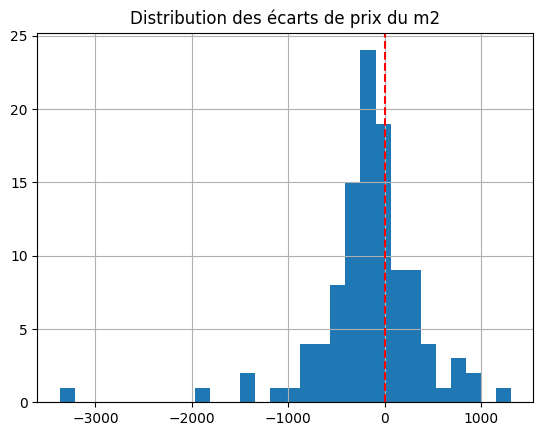

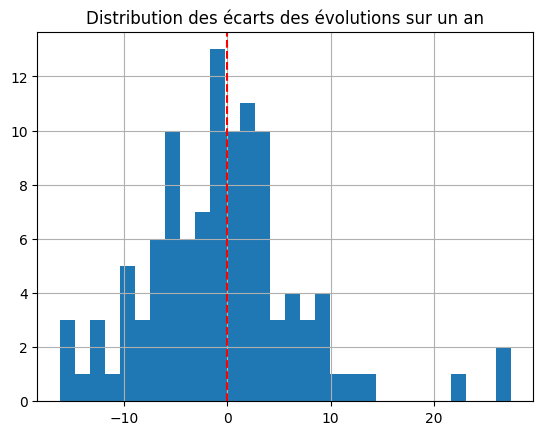

In [47]:
merge["diff_prix"].hist(bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution des écarts de prix du m2')
plt.show()

merge["diff_evol"].hist(bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution des écarts des évolutions sur un an')
plt.show()

Distribution ~ normale des écarts de prix et d'évolution => les différence sont globalement stables et aléatoires autour de 0

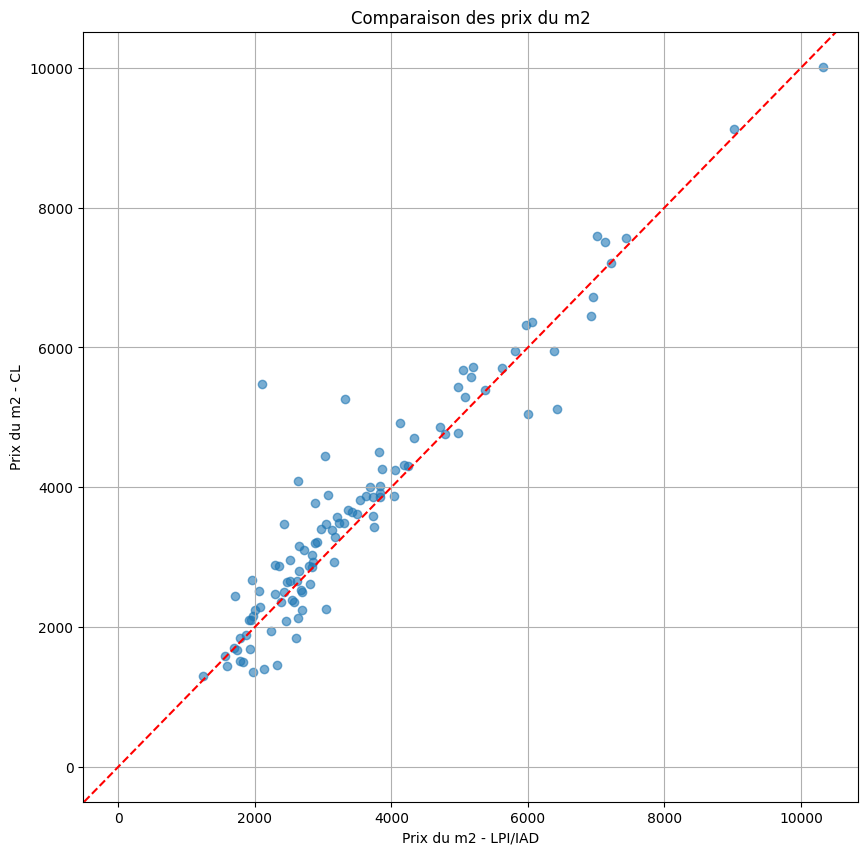

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(merge["Prix du m2 - LPI/IAD"], merge["Prix moyen du m2 - CL"], alpha= 0.6)
plt.axline((0,0), slope = 1, color = "red", linestyle = "--")
plt.xlabel("Prix du m2 - LPI/IAD")
plt.ylabel("Prix du m2 - CL")
plt.title("Comparaison des prix du m2")
plt.grid(True)
plt.show()

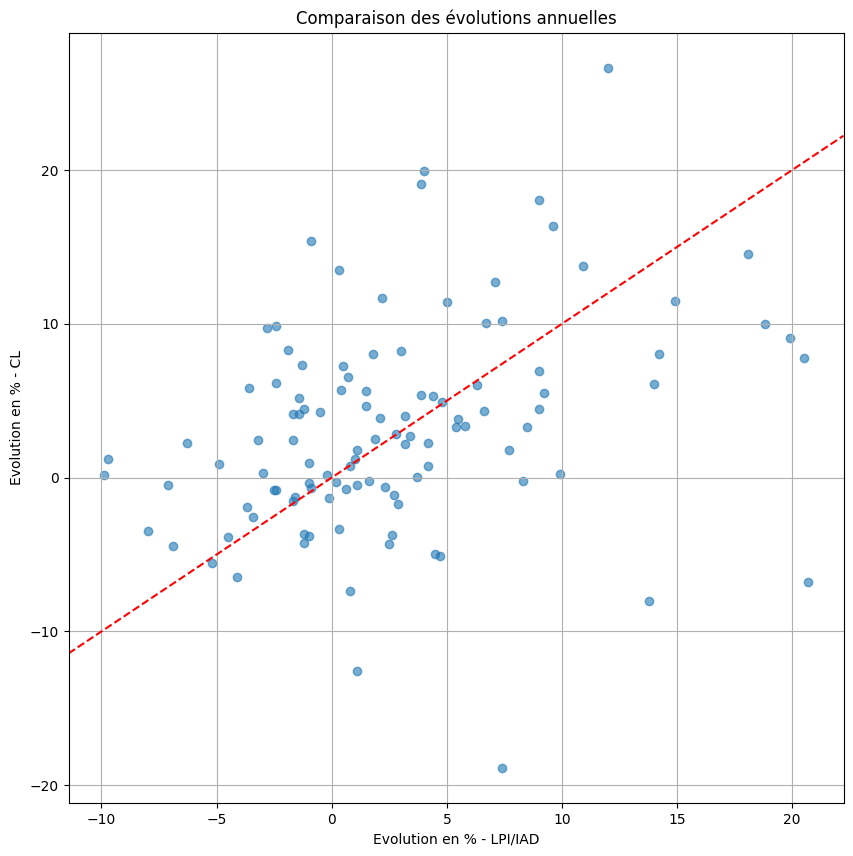

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(merge["Evolution en % - LPI/IAD"], merge["Evolution en % - CL"], alpha= 0.6)
plt.axline((0,0), slope = 1, color = "red", linestyle = "--")
plt.xlabel("Evolution en % - LPI/IAD")
plt.ylabel("Evolution en % - CL")
plt.title("Comparaison des évolutions annuelles")
plt.grid(True)
plt.show()

Les sources évoluent de manière cohérente

### Test statistique

Test de comparaison de Pearson: on calcule la stat de t-test sur 2 échantillons. H0: Les deux échantillons ont des moyennes théoriques identiques

In [50]:
from scipy.stats import ttest_rel

stat, pval = ttest_rel(merge["Evolution en % - LPI/IAD"], merge["Evolution en % - CL"])
print("p-value :", pval)

p-value : 0.5126119524691979


In [51]:
stat, pval = ttest_rel(merge["Prix du m2 - LPI/IAD"], merge["Prix moyen du m2 - CL"])
print("p-value :", pval)

p-value : 0.004434487210194896


* Pour l'évolution en % : p-value >> 0.05 => on ne rejette pas H0, donc les données disponibles ne permettent pas de détecter une différence statistiquement significative 
* Pour le prix du m2 : p-value < 0.05 => on rejette H0: on observe une différence statistiquement significative


Cela implique donc qu'en moyenne, les taux d'évolutions sur un an au mois de mai des deux sources sont globalement similaires. Cependant, on observera une différence significative dans les niveaux de prix (lié aux différences méthodologiques, périmètres...)